# Test stuff for PFN model

Classify pions, photons, and **axion2s**

In [1]:
# Add import paths
import sys
sys.path.append("..")

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import datetime as dt
from utils import print_gpu_memory, model_dir

# Make tensorflow not use too much memory
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Get data
from data import get_data
(X_train, X_val, X_test,
 Y_train, Y_val, Y_test) = get_data("processed/axion2_test/all_jets_point_cloud.npz")

print(X_train.shape, Y_train.shape)

(240000, 960, 4) (240000, 3)


In [4]:
# Build model
from model import PFN
Phi_sizes = [128, 128, 128, 128, 64, 64, 64]
F_sizes = [128, 128, 128, 128, 64, 64, 64]

_, n_particles, n_features = X_train.shape
model = PFN(
    n_features=n_features,
    n_particles=n_particles,
    n_outputs=Y_train.shape[1],
    Phi_sizes=Phi_sizes,
    F_sizes=F_sizes
)

In [5]:
from collections import defaultdict
history = defaultdict(list)

In [6]:
# Utility functions for training
from train_model import train_model
import yaml

def train_iteration(lr, epochs):
    fit_history = train_model(
        model=model, 
        data=(X_train, X_val, Y_train, Y_val),
        lr=lr,
        epochs=epochs
    )
    print(f"\nSaving history...")
    for key in ["loss", "val_loss", "accuracy", "val_accuracy"]:
        history[key].extend(fit_history.history[key])
    return fit_history

def save_model(name):
    cur_date = dt.datetime.now().strftime("%Y-%m-%d")
    model.save(f"{model_dir}/{name}_{cur_date}")

In [7]:
print_gpu_memory()

GPU memory usage
  current: 556.75 KB
  peak:    618.25 KB


In [8]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-4, epochs=45)

=== Training [2023-06-10 00:39:27.080289] ===
Epoch 1/45
2400/2400 [==============================] - 61s 20ms/step - loss: 1.5039 - accuracy: 0.3524 - val_loss: 1.0055 - val_accuracy: 0.4673
Epoch 2/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.9486 - accuracy: 0.5115 - val_loss: 0.9035 - val_accuracy: 0.5408
Epoch 3/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.8841 - accuracy: 0.5475 - val_loss: 0.8705 - val_accuracy: 0.5446
Epoch 4/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.8519 - accuracy: 0.5638 - val_loss: 0.8437 - val_accuracy: 0.5660
Epoch 5/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.8673 - accuracy: 0.5591 - val_loss: 0.8816 - val_accuracy: 0.5493
Epoch 6/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.8400 - accuracy: 0.5737 - val_loss: 0.7529 - val_accuracy: 0.6238
Epoch 7/45
2400/2400 [==============================] - 46s 19ms/step - loss: 

In [9]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-5, epochs=45)

=== Training [2023-06-10 01:13:56.713851] ===
Epoch 1/45
2400/2400 [==============================] - 53s 19ms/step - loss: 0.1996 - accuracy: 0.9187 - val_loss: 0.2062 - val_accuracy: 0.9168
Epoch 2/45
2400/2400 [==============================] - 46s 19ms/step - loss: 0.1942 - accuracy: 0.9216 - val_loss: 0.1936 - val_accuracy: 0.9220
Epoch 3/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1894 - accuracy: 0.9234 - val_loss: 0.1902 - val_accuracy: 0.9248
Epoch 4/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1859 - accuracy: 0.9250 - val_loss: 0.1889 - val_accuracy: 0.9250
Epoch 5/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1825 - accuracy: 0.9265 - val_loss: 0.1822 - val_accuracy: 0.9279
Epoch 6/45
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1789 - accuracy: 0.9285 - val_loss: 0.1885 - val_accuracy: 0.9246
Epoch 7/45
2400/2400 [==============================] - 45s 19ms/step - loss: 

In [10]:
print(f"=== Training [{dt.datetime.now()}] ===")
train_iteration(lr=2e-6, epochs=30)

=== Training [2023-06-10 01:48:28.294255] ===
Epoch 1/30
2400/2400 [==============================] - 70s 19ms/step - loss: 0.0961 - accuracy: 0.9658 - val_loss: 0.1034 - val_accuracy: 0.9648
Epoch 2/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0948 - accuracy: 0.9663 - val_loss: 0.1020 - val_accuracy: 0.9650
Epoch 3/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0943 - accuracy: 0.9665 - val_loss: 0.1009 - val_accuracy: 0.9648
Epoch 4/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0941 - accuracy: 0.9667 - val_loss: 0.1008 - val_accuracy: 0.9651
Epoch 5/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0939 - accuracy: 0.9666 - val_loss: 0.1014 - val_accuracy: 0.9647
Epoch 6/30
2400/2400 [==============================] - 45s 19ms/step - loss: 0.0936 - accuracy: 0.9668 - val_loss: 0.1009 - val_accuracy: 0.9646
Epoch 7/30
2400/2400 [==============================] - 45s 19ms/step - loss: 

In [11]:
save_model("")

INFO:tensorflow:Assets written to: /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/models/pfn/_2023-06-10/assets


### Evaluate model

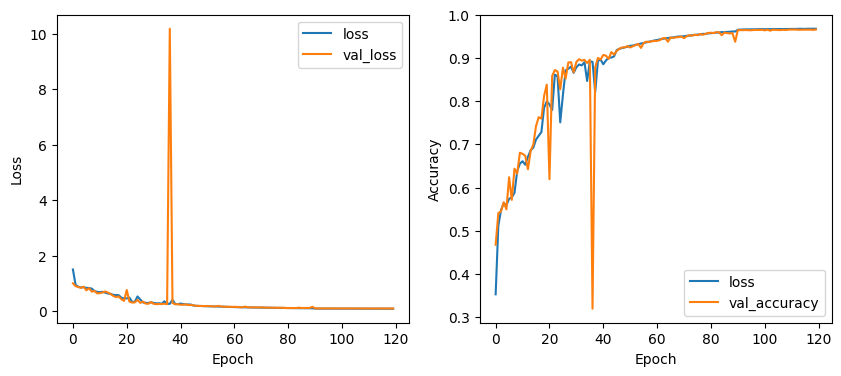

In [12]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
ax1, ax2 = axs

ax1.plot(history["loss"])
ax1.plot(history["val_loss"])
ax1.legend(["loss", "val_loss"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss");

ax2.plot(history["accuracy"])
ax2.plot(history["val_accuracy"])
ax2.legend(["loss", "val_accuracy"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy");

60/60 [==============================] - 2s 29ms/step
Testing accuracy: 0.9681333333333333


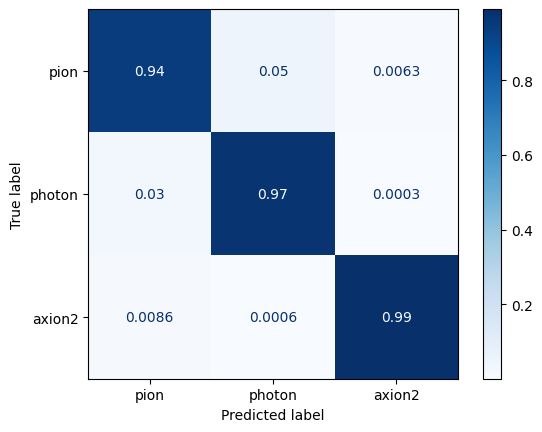

In [13]:
# Test model
from test_model import test_model, plot_cm
test_accuracy, cm = test_model(model, (X_test, Y_test))
print(f"Testing accuracy: {test_accuracy}")

plot_cm(cm, ["pion", "photon", "axion2"])